In [2]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

In [3]:
df = pd.read_csv("cubic_zirconia (3).csv")

In [4]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [5]:
df.drop('Unnamed: 0',inplace =True, axis=1)

Observation: 1. We have dropped 'Unnamed: 0' column 2. We have 3 ordinal variable column. 

In [6]:
df.duplicated().sum()

34

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(26933, 10)

In [10]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [13]:
df.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


## Univariate Analysis

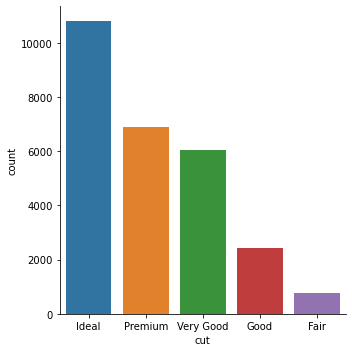

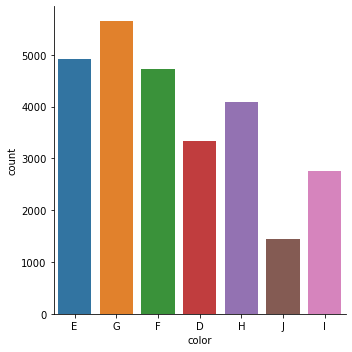

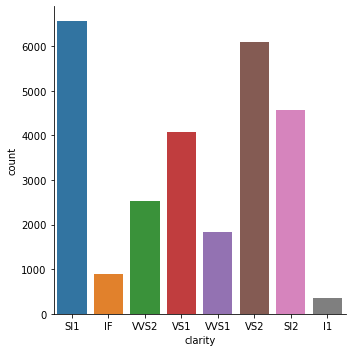

In [14]:
sns.catplot(x= 'cut',data=df, kind='count')
sns.catplot(x='color',data=df, kind='count')
sns.catplot(x='clarity',data=df,kind='count');

In [15]:
df.cut.value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

In [16]:
df.clarity.value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

In [17]:
df.color.value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

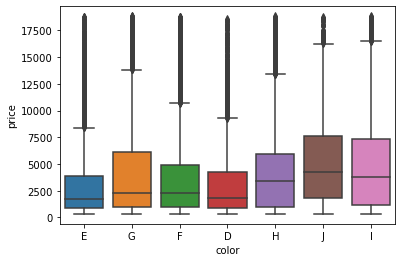

In [18]:
sns.boxplot(x= 'color', y= 'price',data= df, orient ="v");

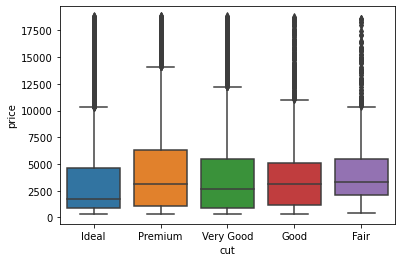

In [19]:
sns.boxplot(x= 'cut', y= 'price',data= df, orient ="v");

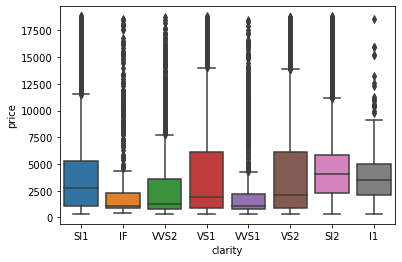

In [20]:
sns.boxplot(x= 'clarity', y= 'price',data= df, orient ="v");

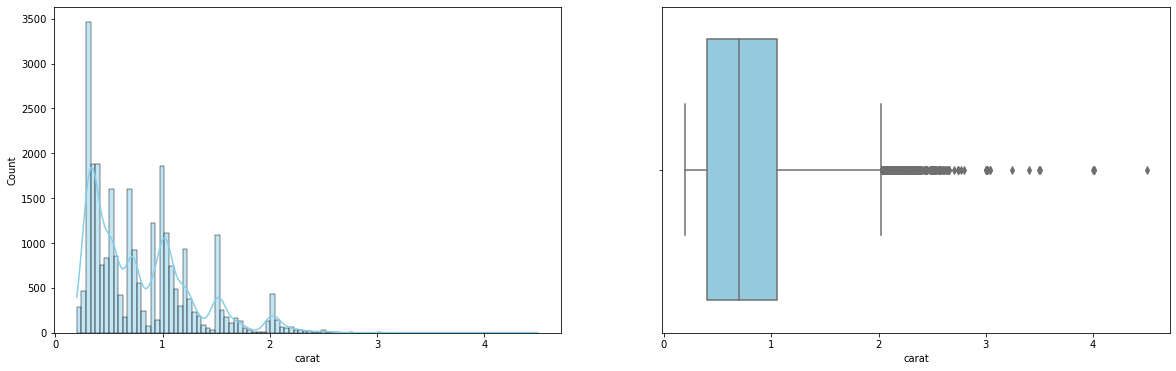

In [21]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'carat' ,data=df, kde=True, ax=axs[0], color='skyblue')
sns.boxplot(x='carat',data=df, ax=axs[1], color='skyblue');

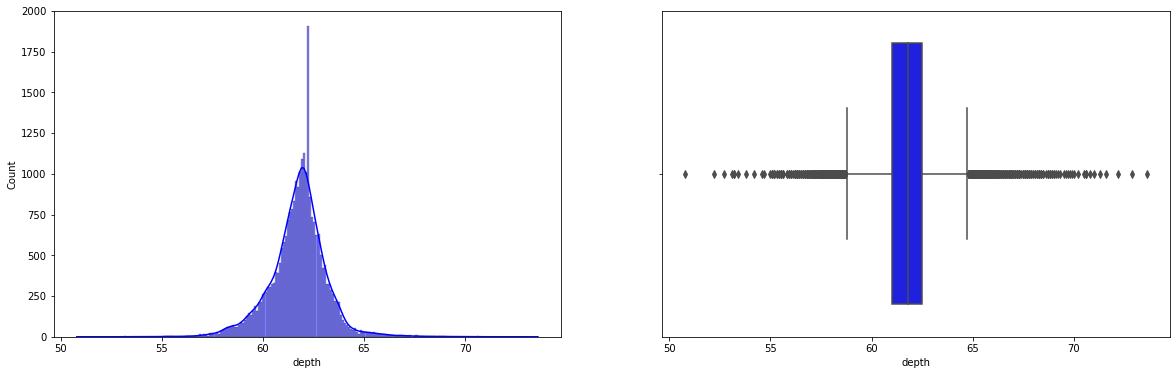

In [22]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'depth' ,data=df, kde=True, ax=axs[0], color='blue')
sns.boxplot(x='depth',data=df, ax=axs[1], color='blue');

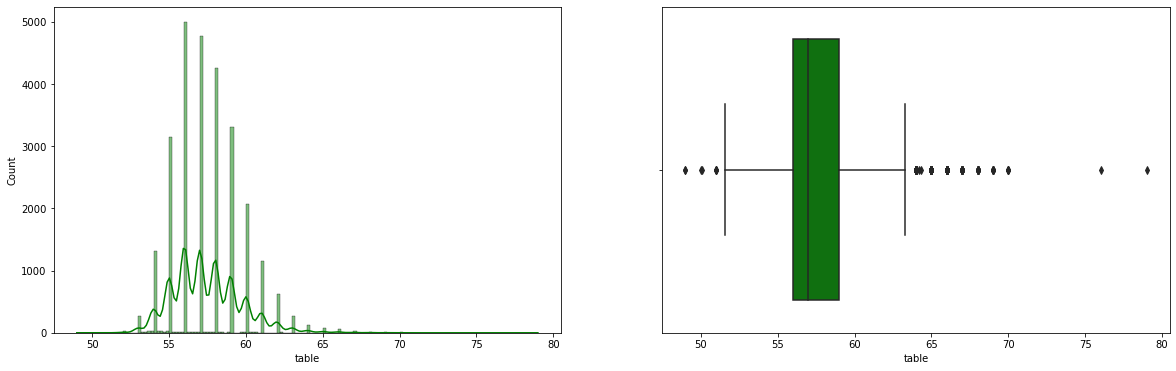

In [23]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'table' ,data=df, kde=True, ax=axs[0], color='green')
sns.boxplot(x='table',data=df, ax=axs[1], color='green');

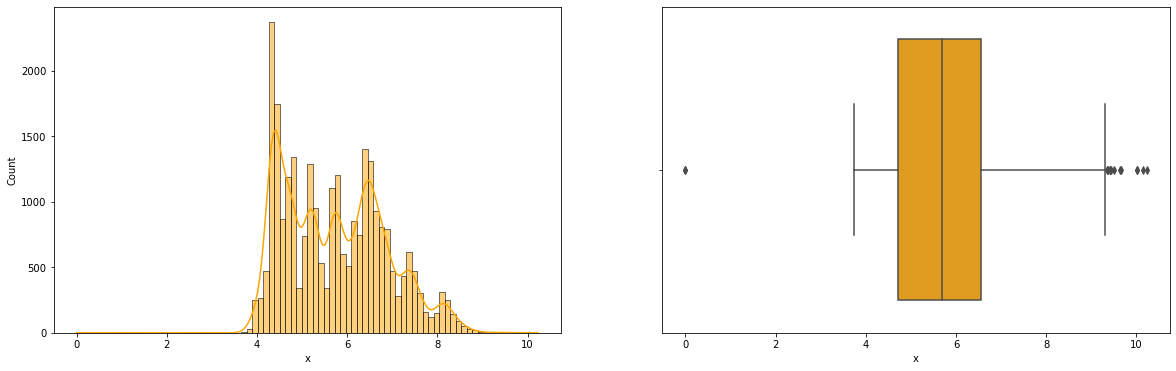

In [24]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'x' ,data=df, kde=True, ax=axs[0], color='orange')
sns.boxplot(x='x',data=df, ax=axs[1], color='orange');

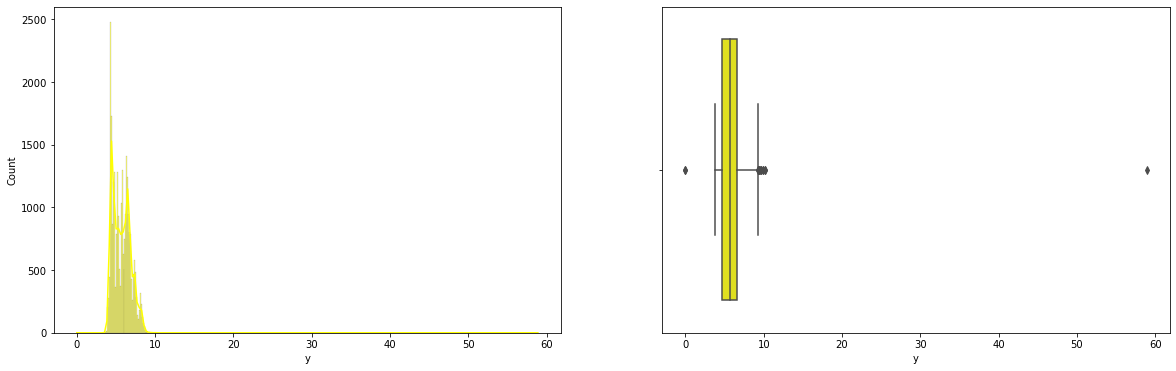

In [25]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'y' ,data=df, kde=True, ax=axs[0], color='yellow')
sns.boxplot(x='y',data=df, ax=axs[1], color='yellow');

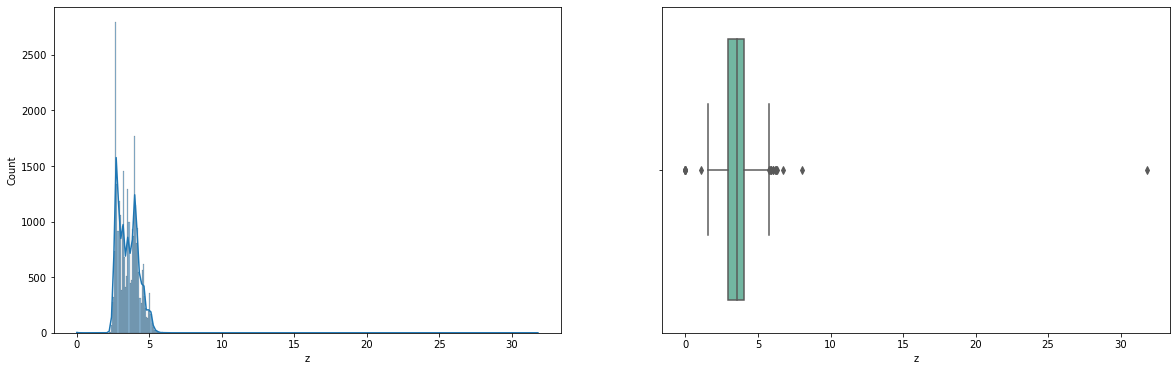

In [26]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'z' ,data=df, kde=True, ax=axs[0], palette='Set2')
sns.boxplot(x='z',data=df, ax=axs[1], palette='Set2');

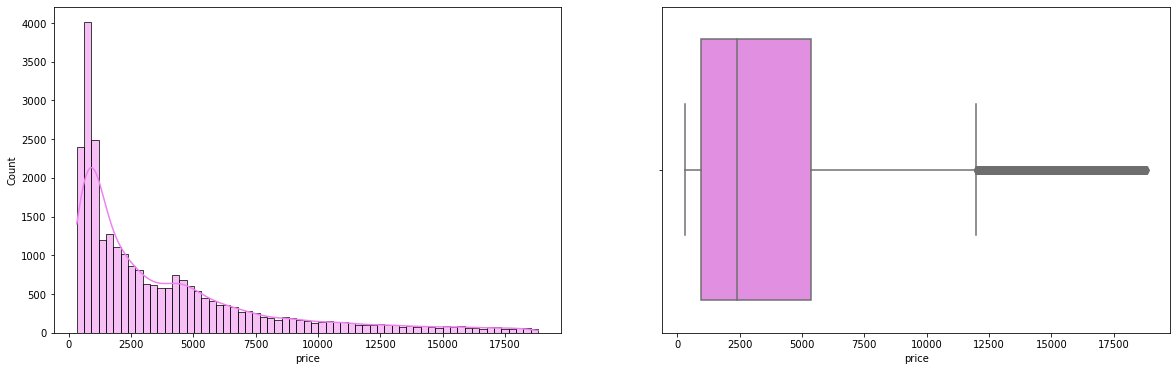

In [27]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'price' ,data=df, kde=True, ax=axs[0], color='violet')
sns.boxplot(x='price',data=df, ax=axs[1], color='violet');

## Biivariate Analysis

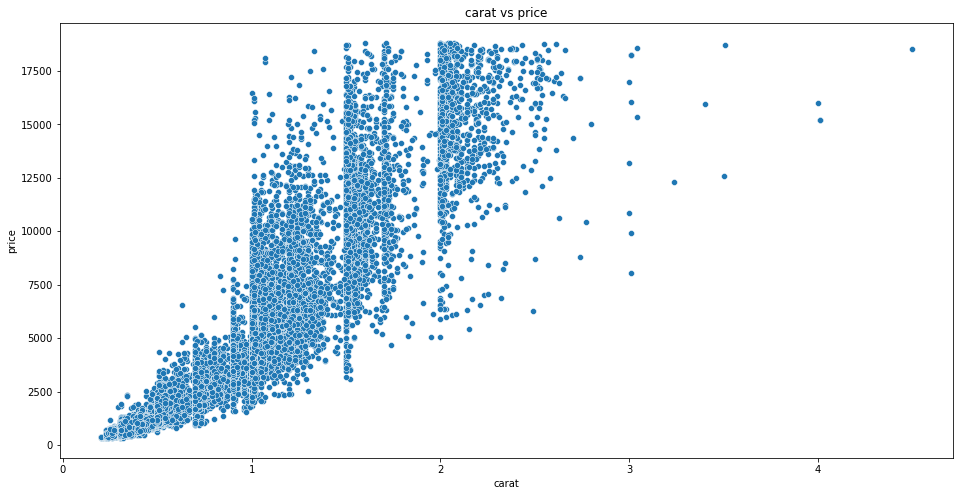

In [28]:
plt.figure(figsize=(16,8))
sns.scatterplot(x= 'carat',y='price', data =df)
plt.title('carat vs price')
plt.show()

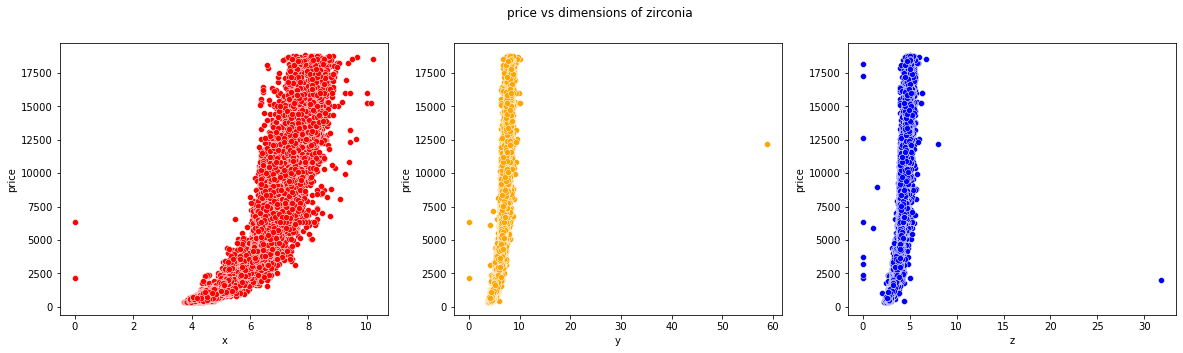

In [29]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.scatterplot(data= df, x= 'x', y= 'price', color='red')

plt.subplot(132)
sns.scatterplot(data= df,x= 'y', y= 'price', color='orange')

plt.subplot(133)
sns.scatterplot(data= df, x= 'z', y= 'price', color='blue')

plt.suptitle('price vs dimensions of zirconia')
plt.show()

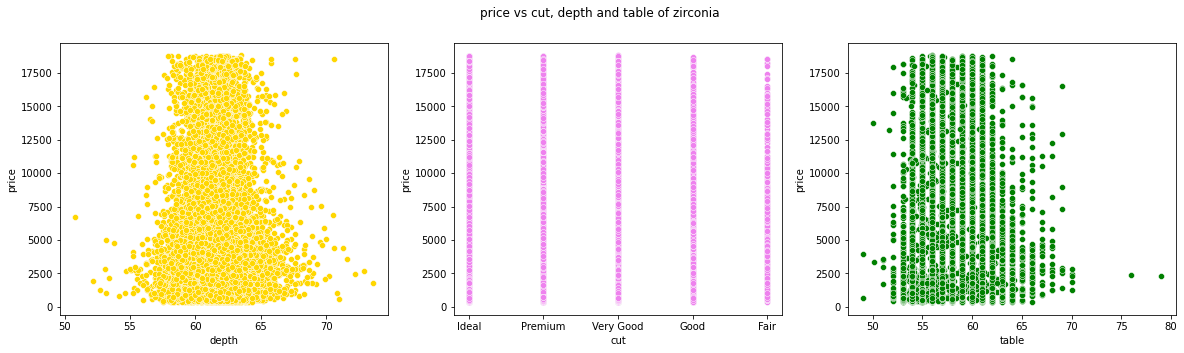

In [30]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.scatterplot(data= df, x= 'depth', y= 'price', color='gold')

plt.subplot(132)
sns.scatterplot(data= df, x= 'cut', y= 'price', color='violet')

plt.subplot(133)
sns.scatterplot(data= df,x= 'table', y= 'price', color='green')

plt.suptitle('price vs cut, depth and table of zirconia');

## Multivariate Analysis

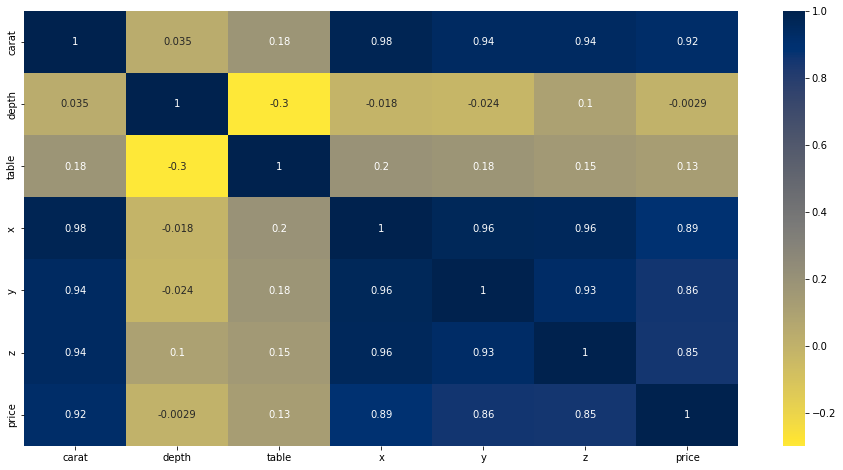

In [31]:
plt.figure(figsize=(16,8))
corr= df.corr()
sns.heatmap(data= corr, annot=True, cmap= 'cividis_r' )
plt.show();

In [32]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973,-0.002895
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002895,0.126844,0.886554,0.856441,0.850682,1.000000


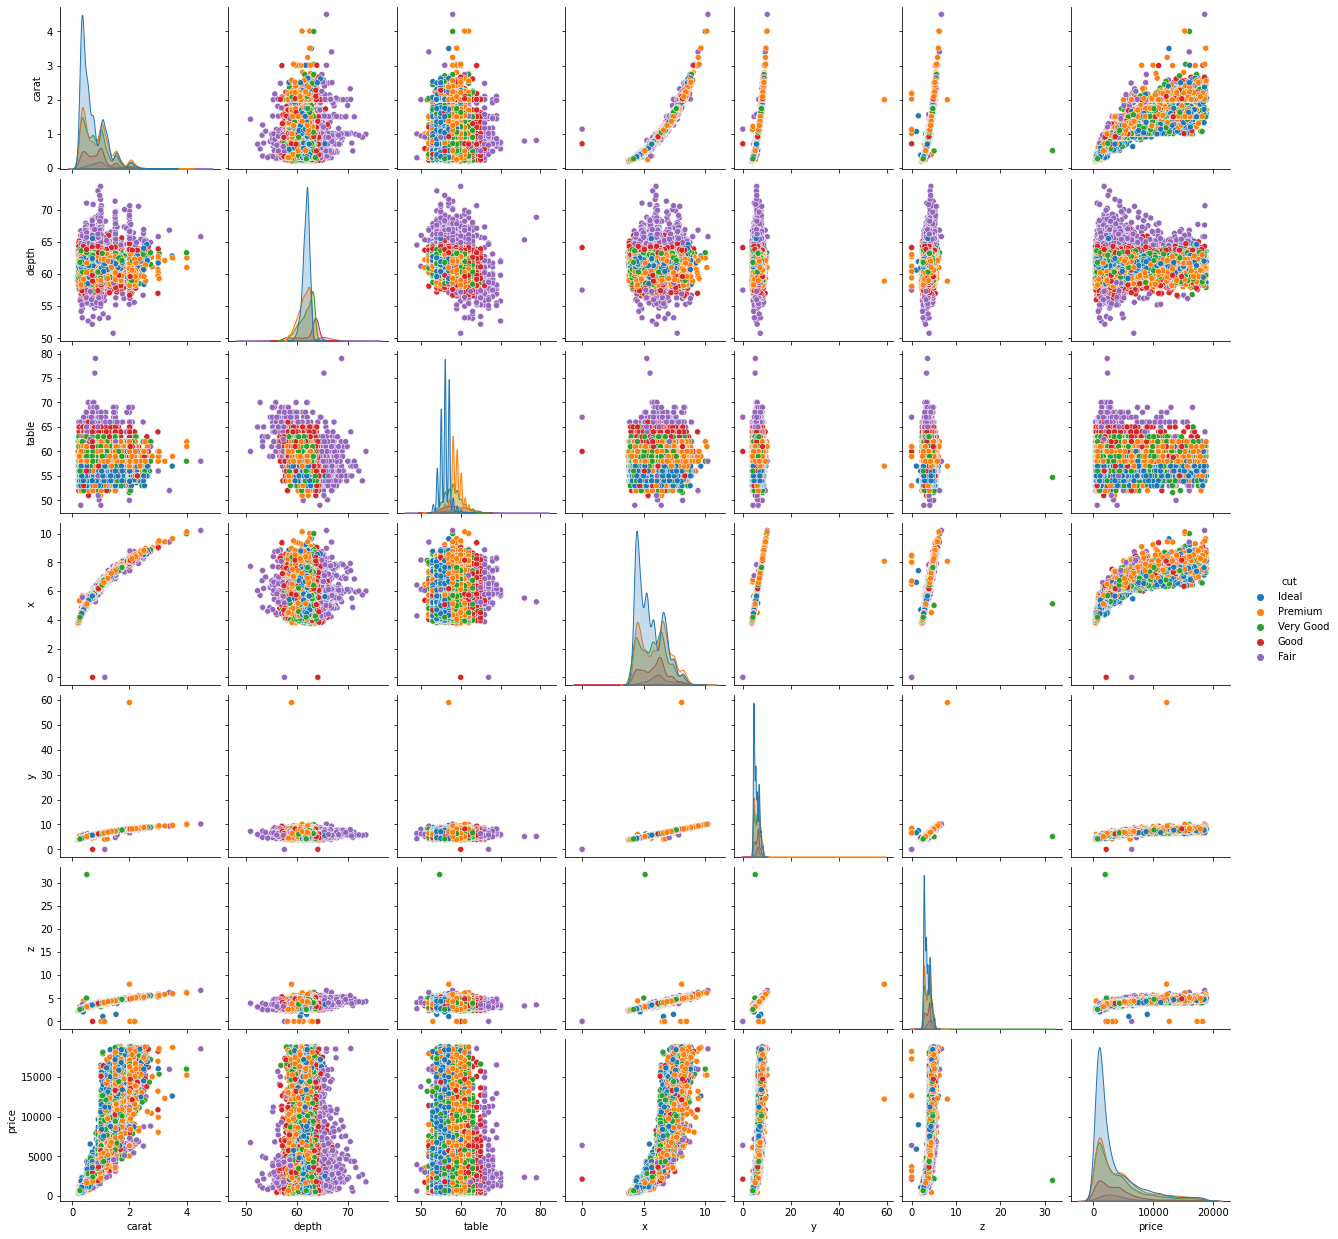

In [33]:
sns.pairplot(data= df, hue='cut')  
plt.show()

In [34]:
df.isin([0]).any().any()

True

In [35]:
df.isin([0]).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          2
y          2
z          8
price      0
dtype: int64

imputing values of zero with mean values of the respective columns as x,y and z variables are highly correlated with price.

In [36]:
df.mean()

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_17596/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


carat       0.798010
depth      61.745285
table      57.455950
x           5.729346
y           5.733102
z           3.537769
price    3937.526120
dtype: float64

In [37]:
df['x']=df['x'].replace({0:df['x'].mean()})

In [38]:
df['y']=df['y'].replace({0:df['y'].mean()})

In [39]:
df['z']=df['z'].replace({0:df['z'].mean()})

In [40]:
df.isin([0]).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

since we have 697 null values in depth, we will drop them these values. 

In [41]:
df.fillna(value=df['depth']. mean(), inplace=True)

In [42]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

outlier treatment

In [43]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

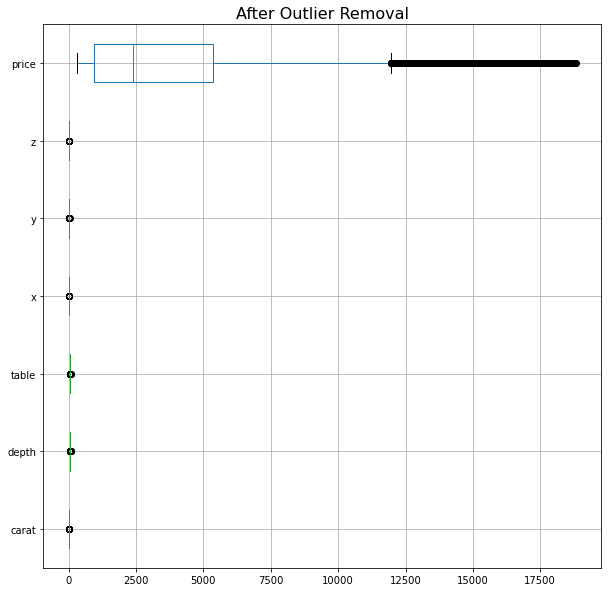

In [44]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

encoding categorical variables with "get dummy" code. 

In [45]:
df = pd.get_dummies(df, columns=['cut','clarity','color'],drop_first=True)

In [46]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [47]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [49]:
from scipy.stats import zscore

In [51]:
X.apply(zscore)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,-1.043547,0.254491,0.243737,-1.296119,-1.240179,-1.225070,-0.315271,1.221737,-0.586083,-0.536927,...,-0.422958,-0.540713,-0.270711,-0.321987,2.116280,-0.461142,-0.515411,-0.423446,-0.338242,-0.237668
1,-0.980684,-0.678196,0.243737,-1.162935,-1.094126,-1.169310,-0.315271,-0.818506,1.706244,-0.536927,...,-0.422958,-0.540713,-0.270711,-0.321987,-0.472527,-0.461142,1.940199,-0.423446,-0.338242,-0.237668
2,0.213713,0.326236,1.139749,0.275449,0.332030,0.336203,-0.315271,-0.818506,-0.586083,1.862451,...,-0.422958,-0.540713,-0.270711,3.105713,2.116280,-0.461142,-0.515411,-0.423446,-0.338242,-0.237668
3,-0.792095,-0.104235,-0.652274,-0.807778,-0.802022,-0.806872,-0.315271,1.221737,-0.586083,-0.536927,...,2.364301,-0.540713,-0.270711,-0.321987,-0.472527,2.168529,-0.515411,-0.423446,-0.338242,-0.237668
4,-1.022593,-0.965177,0.691743,-1.225087,-1.119900,-1.239010,-0.315271,1.221737,-0.586083,-0.536927,...,-0.422958,-0.540713,3.693976,-0.321987,-0.472527,2.168529,-0.515411,-0.423446,-0.338242,-0.237668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,0.653754,0.397981,0.243737,0.781547,0.675683,0.768341,-0.315271,-0.818506,1.706244,-0.536927,...,-0.422958,-0.540713,-0.270711,-0.321987,-0.472527,-0.461142,1.940199,-0.423446,-0.338242,-0.237668
26963,-0.980684,0.111000,-1.100279,-1.145177,-1.128492,-1.113550,-0.315271,1.221737,-0.586083,-0.536927,...,-0.422958,-0.540713,-0.270711,-0.321987,-0.472527,-0.461142,-0.515411,2.361577,-0.338242,-0.237668
26964,-0.603506,-0.032490,0.243737,-0.541411,-0.501326,-0.514133,-0.315271,-0.818506,1.706244,-0.536927,...,-0.422958,1.849410,-0.270711,-0.321987,2.116280,-0.461142,-0.515411,-0.423446,-0.338242,-0.237668
26965,-1.106410,0.039255,-0.652274,-1.367150,-1.317500,-1.308709,-0.315271,-0.818506,-0.586083,1.862451,...,-0.422958,-0.540713,-0.270711,3.105713,-0.472527,2.168529,-0.515411,-0.423446,-0.338242,-0.237668


In [73]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,62.1,58.0,4.27,4.29,2.66,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0.42,61.6,56.0,4.82,4.80,2.96,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [52]:
X.describe()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,...,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729772,5.733528,3.538820,0.090410,0.401181,0.255671,0.223778,...,0.151747,0.226228,0.068281,0.093937,0.182527,0.175361,0.209891,0.152044,0.102662,0.053466
std,0.477237,1.393848,2.232156,1.126285,1.163989,0.717377,0.286773,0.490147,0.436246,0.416782,...,0.358782,0.418396,0.252231,0.291746,0.386285,0.380283,0.407238,0.359070,0.303523,0.224965
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.900000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
y.apply(zscore)

,price
0,-0.854828
1,-0.734256
2,0.584584
3,-0.709892
4,-0.785219
...,...
26962,0.365564
26963,-0.701937
26964,-0.567194
26965,-0.809334


In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [66]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [67]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 11631.576094392187
The coefficient for depth is -69.29717962855523
The coefficient for table is -25.481587876621056
The coefficient for x is -1143.1375060097178
The coefficient for y is -2.577338693013128
The coefficient for z is -48.90198836046551
The coefficient for cut_Good is 538.2068750507245
The coefficient for cut_Ideal is 778.0485269981845
The coefficient for cut_Premium is 684.8129241164143
The coefficient for cut_Very Good is 673.1805586538385
The coefficient for clarity_IF is 5185.710171172133
The coefficient for clarity_SI1 is 3503.7378924768195
The coefficient for clarity_SI2 is 2516.8232544881275
The coefficient for clarity_VS1 is 4418.169337564728
The coefficient for clarity_VS2 is 4105.750549873478
The coefficient for clarity_VVS1 is 4855.720420703052
The coefficient for clarity_VVS2 is 4817.691677336932
The coefficient for color_E is -186.54370159017463
The coefficient for color_F is -283.1173135037588
The coefficient for color_G is -489.97

In [68]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3240.579778326756


In [69]:
regression_model.score(X_train, y_train)

0.9205314517647545

In [70]:
regression_model.score(X_test, y_test)

0.9234410723100088

In [71]:
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1130.272757306168

In [72]:
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1121.347884415457